In [40]:
# Importar bibliotecas essenciais para manipulação de dados e visualização.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [41]:
# Acessando o arquivo e lendo
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Arquivos no diretório:", files)

csv_file = [f for f in files if f.endswith('.csv')][0]

df = pd.read_csv(os.path.join(path, csv_file), encoding='latin1')

Path to dataset files: /kaggle/input/superstore-dataset-final
Arquivos no diretório: ['Sample - Superstore.csv']


## SEÇÃO 2: Análise Exploratória de Dados (EDA)
Esta seção realiza uma inspeção inicial dos dados para entender sua estrutura,
tipos de dados, valores ausentes e estatísticas descritivas.

In [42]:
# Informações Iniciais do Dataset
print("Primeiras 5 linhas do dataset:")
print(df.head())


Primeiras 5 linhas do dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

In [43]:
# Exibe tipos de dados e valores não nulos.
print("\nInformações sobre o dataset (df.info()):")
df.info()


Informações sobre o dataset (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales     

In [44]:
# Exibe estatísticas descritivas para colunas numéricas.
print("\nEstatísticas descritivas para colunas numéricas (df.describe()):")
print(df.describe())


Estatísticas descritivas para colunas numéricas (df.describe()):
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [45]:
# Verifica a presença de valores ausentes em cada coluna.
print("\nValores ausentes por coluna (df.isnull().sum()):")
print(df.isnull().sum())


Valores ausentes por coluna (df.isnull().sum()):
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [46]:
# Converte colunas de data para o tipo datetime para facilitar a análise temporal.
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print("\nColunas 'Order Date' e 'Ship Date' convertidas para datetime.")


Colunas 'Order Date' e 'Ship Date' convertidas para datetime.


In [47]:
# Adiciona colunas de ano e mês para análise sazonal.
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
print("Colunas 'Order Year' e 'Order Month' adicionadas.")

Colunas 'Order Year' e 'Order Month' adicionadas.


## SEÇÃO 3: Análise de Lucratividade por Categoria e Sub-Categoria
Identificar quais categorias e sub-categorias são as mais lucrativas e quais
podem estar gerando prejuízo.

In [48]:
# Agrupar por Categoria e calcular a soma total de Vendas e Lucro.
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print("\nPerformance por Categoria (Vendas e Lucro):")
print(category_performance)


Performance por Categoria (Vendas e Lucro):
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728


<ipython-input-49-d3cb71bc2858>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_performance.index, y=category_performance['Profit'], palette='viridis')


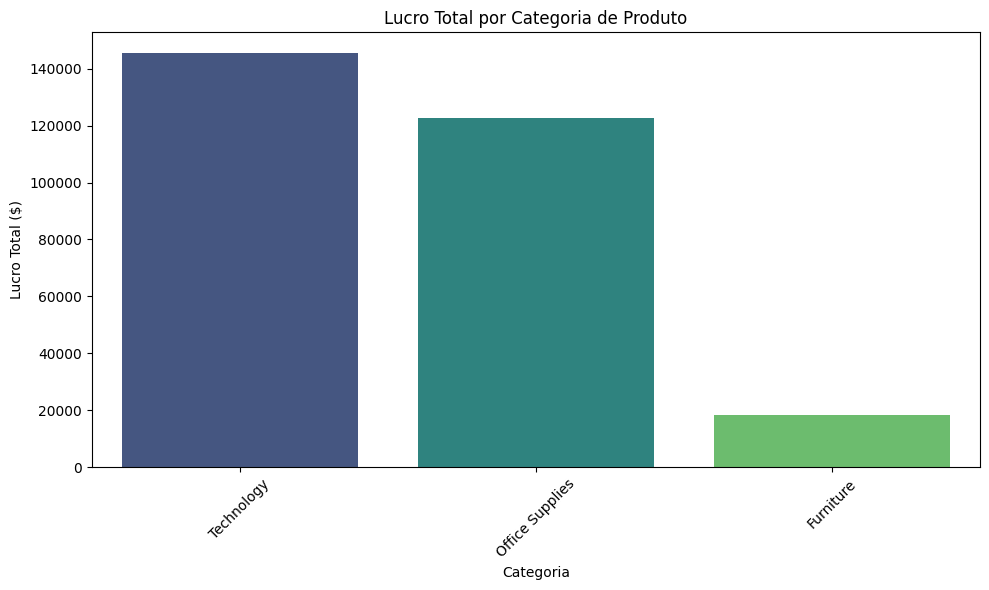


(Gráfico de Barras: Lucro Total por Categoria - simulação)


In [49]:
# Visualização: Gráfico de Barras para Lucro por Categoria.
plt.figure(figsize=(10, 6))
sns.barplot(x=category_performance.index, y=category_performance['Profit'], palette='viridis')
plt.title('Lucro Total por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Lucro Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n(Gráfico de Barras: Lucro Total por Categoria - simulação)")

In [50]:
# Agrupar por Sub-Categoria e calcular a soma total de Vendas e Lucro.
subcategory_performance = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print("\nPerformance por Sub-Categoria (Top 10 e Bottom 5 por Lucro):")
print(subcategory_performance.head(10)) # Top 10
print(subcategory_performance.tail(5)) # Bottom 5 (para identificar prejuízos)



Performance por Sub-Categoria (Top 10 e Bottom 5 por Lucro):
                   Sales      Profit
Sub-Category                        
Copiers       149528.030  55617.8249
Phones        330007.054  44515.7306
Accessories   167380.318  41936.6357
Paper          78479.206  34053.5693
Binders       203412.733  30221.7633
Chairs        328449.103  26590.1663
Storage       223843.608  21278.8264
Appliances    107532.161  18138.0054
Furnishings    91705.164  13059.1436
Envelopes      16476.402   6964.1767
                    Sales      Profit
Sub-Category                         
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811


<ipython-input-51-5946188e5568>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_performance.head(10)['Profit'], y=subcategory_performance.head(10).index, palette='coolwarm')


(Gráfico de Barras: Top 10 Sub-Categorias por Lucro - simulação)


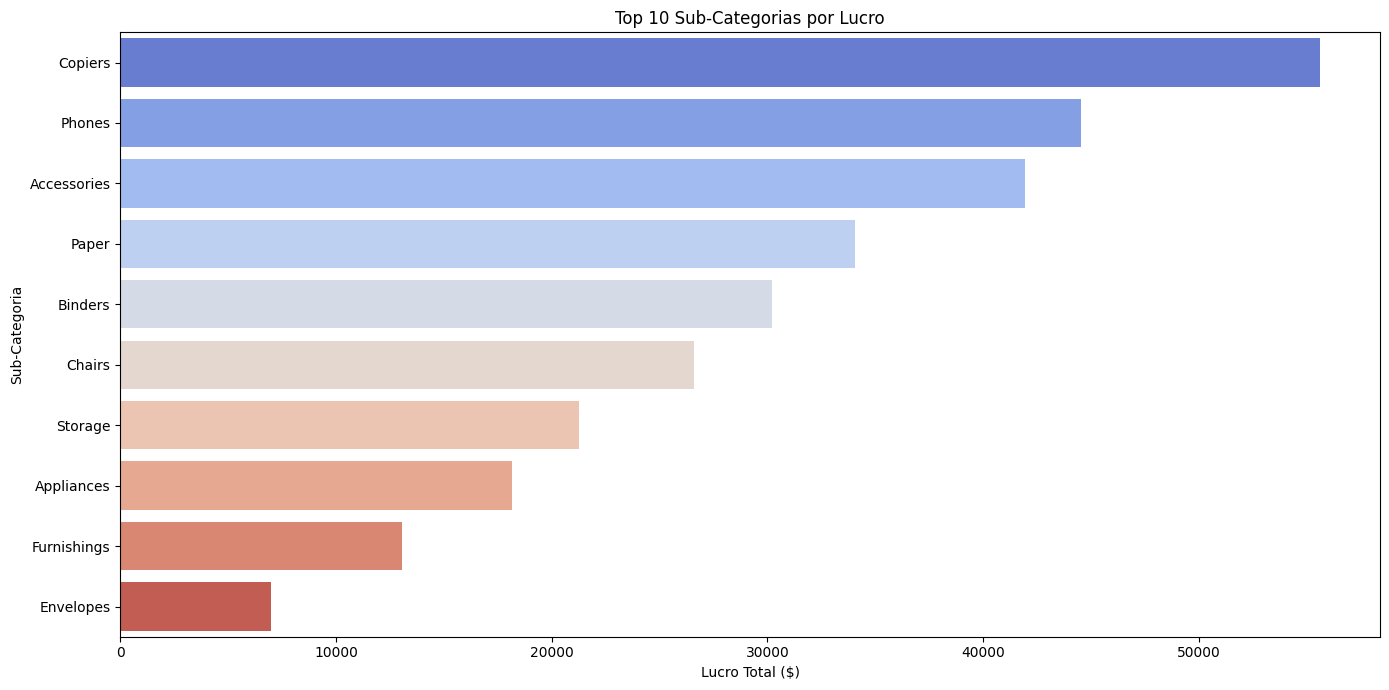

In [51]:
# Visualização: Gráfico de Barras para Lucro por Sub-Categoria (Top N).
plt.figure(figsize=(14, 7))
sns.barplot(x=subcategory_performance.head(10)['Profit'], y=subcategory_performance.head(10).index, palette='coolwarm')
plt.title('Top 10 Sub-Categorias por Lucro')
plt.xlabel('Lucro Total ($)')
plt.ylabel('Sub-Categoria')
plt.tight_layout()
plt.show()
print("(Gráfico de Barras: Top 10 Sub-Categorias por Lucro - simulação)")

(Gráfico de Barras: Sub-Categorias com Maiores Prejuízos - simulação)


<ipython-input-52-1068c5e1646e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_performance.tail(5)['Profit'], y=subcategory_performance.tail(5).index, palette='Reds_d')


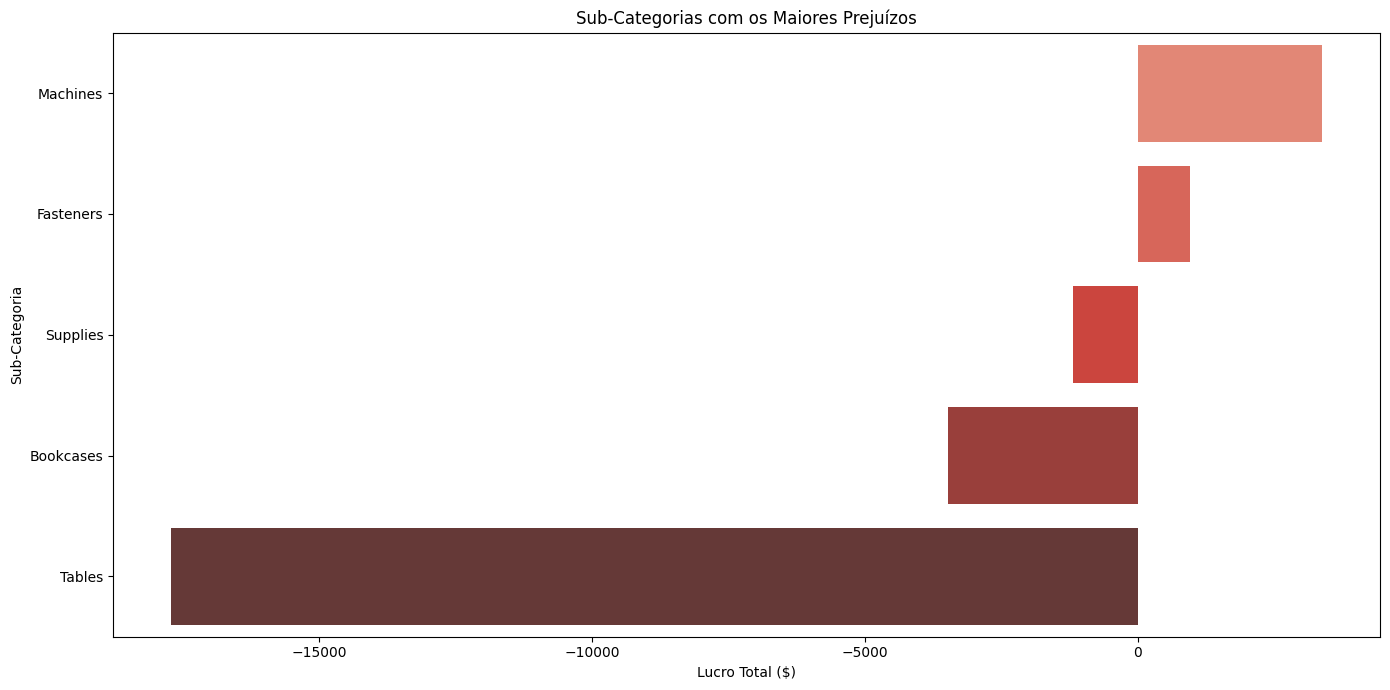

In [52]:
# Visualização: Gráfico de Barras para Lucro por Sub-Categoria (Bottom N - para identificar prejuízos).
plt.figure(figsize=(14, 7))
sns.barplot(x=subcategory_performance.tail(5)['Profit'], y=subcategory_performance.tail(5).index, palette='Reds_d')
plt.title('Sub-Categorias com os Maiores Prejuízos')
plt.xlabel('Lucro Total ($)')
plt.ylabel('Sub-Categoria')
plt.tight_layout()
# plt.show()
print("(Gráfico de Barras: Sub-Categorias com Maiores Prejuízos - simulação)")

## SEÇÃO 4: Análise Geográfica e por Segmento de Cliente
Entender quais regiões e segmentos de clientes impulsionam mais vendas e lucros.

In [53]:
# Agrupar por Região e calcular Vendas e Lucro.
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nPerformance por Região (Vendas e Lucro):")
print(region_performance)


Performance por Região (Vendas e Lucro):
               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


<ipython-input-54-77e33920fce4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_performance.index, y=region_performance['Sales'], palette='Blues_d')


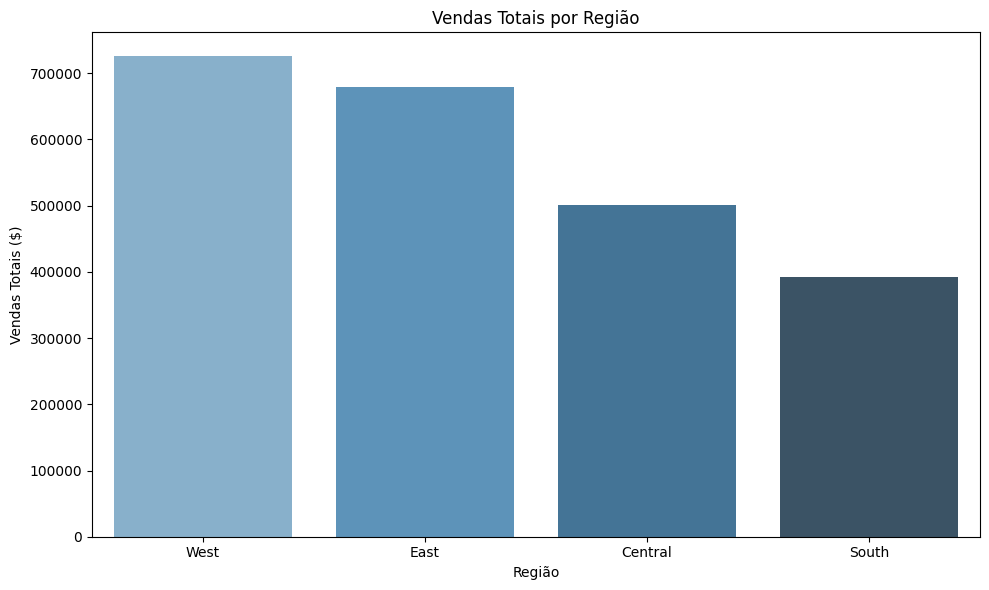

(Gráfico de Barras: Vendas Totais por Região - simulação)


In [54]:
# Visualização: Gráfico de Barras para Vendas por Região.
plt.figure(figsize=(10, 6))
sns.barplot(x=region_performance.index, y=region_performance['Sales'], palette='Blues_d')
plt.title('Vendas Totais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais ($)')
plt.tight_layout()
plt.show()
print("(Gráfico de Barras: Vendas Totais por Região - simulação)")

In [55]:
# Agrupar por Segmento de Cliente e calcular Vendas e Lucro.
segment_performance = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nPerformance por Segmento de Cliente (Vendas e Lucro):")
print(segment_performance)


Performance por Segmento de Cliente (Vendas e Lucro):
                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


<ipython-input-56-0e1aa09f2f23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_performance.index, y=segment_performance['Profit'], palette='Greens_d')


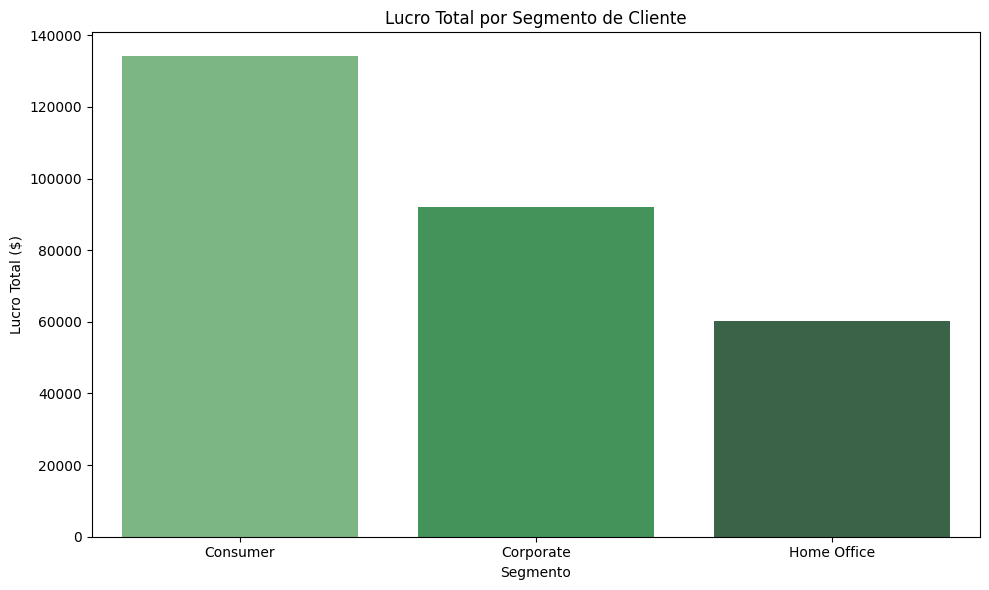

(Gráfico de Barras: Lucro Total por Segmento de Cliente - simulação)


In [56]:
# Visualização: Gráfico de Barras para Lucro por Segmento.
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_performance.index, y=segment_performance['Profit'], palette='Greens_d')
plt.title('Lucro Total por Segmento de Cliente')
plt.xlabel('Segmento')
plt.ylabel('Lucro Total ($)')
plt.tight_layout()
plt.show()
print("(Gráfico de Barras: Lucro Total por Segmento de Cliente - simulação)")

## SEÇÃO 5: Análise Sazonal das Vendas e Lucros
Investigar se há padrões sazonais nas vendas e lucros ao longo do tempo.

In [57]:
# Agrupar por Ano e Mês para vendas e lucro total.
monthly_trends = df.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()
# Criar uma coluna combinada para facilitar a plotagem.
monthly_trends['YearMonth'] = monthly_trends['Order Year'].astype(str) + '-' + monthly_trends['Order Month'].astype(str).str.zfill(2)
monthly_trends = monthly_trends.sort_values(by='YearMonth') # Garantir a ordem cronológica

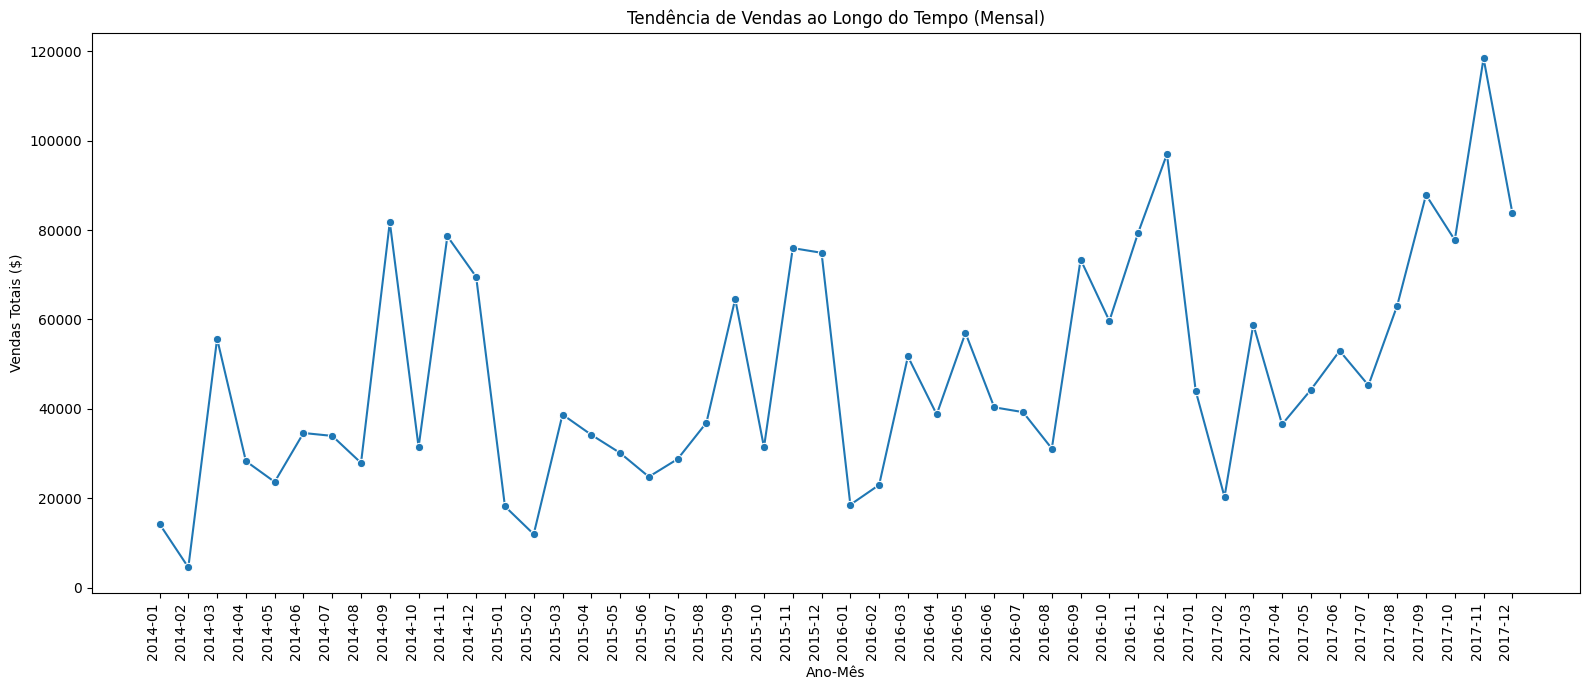

(Gráfico de Linhas: Tendência de Vendas ao Longo do Tempo - simulação)


In [58]:
# Visualização: Linha de Vendas ao longo do tempo.
plt.figure(figsize=(16, 7))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_trends, marker='o')
plt.title('Tendência de Vendas ao Longo do Tempo (Mensal)')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais ($)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
print("(Gráfico de Linhas: Tendência de Vendas ao Longo do Tempo - simulação)")

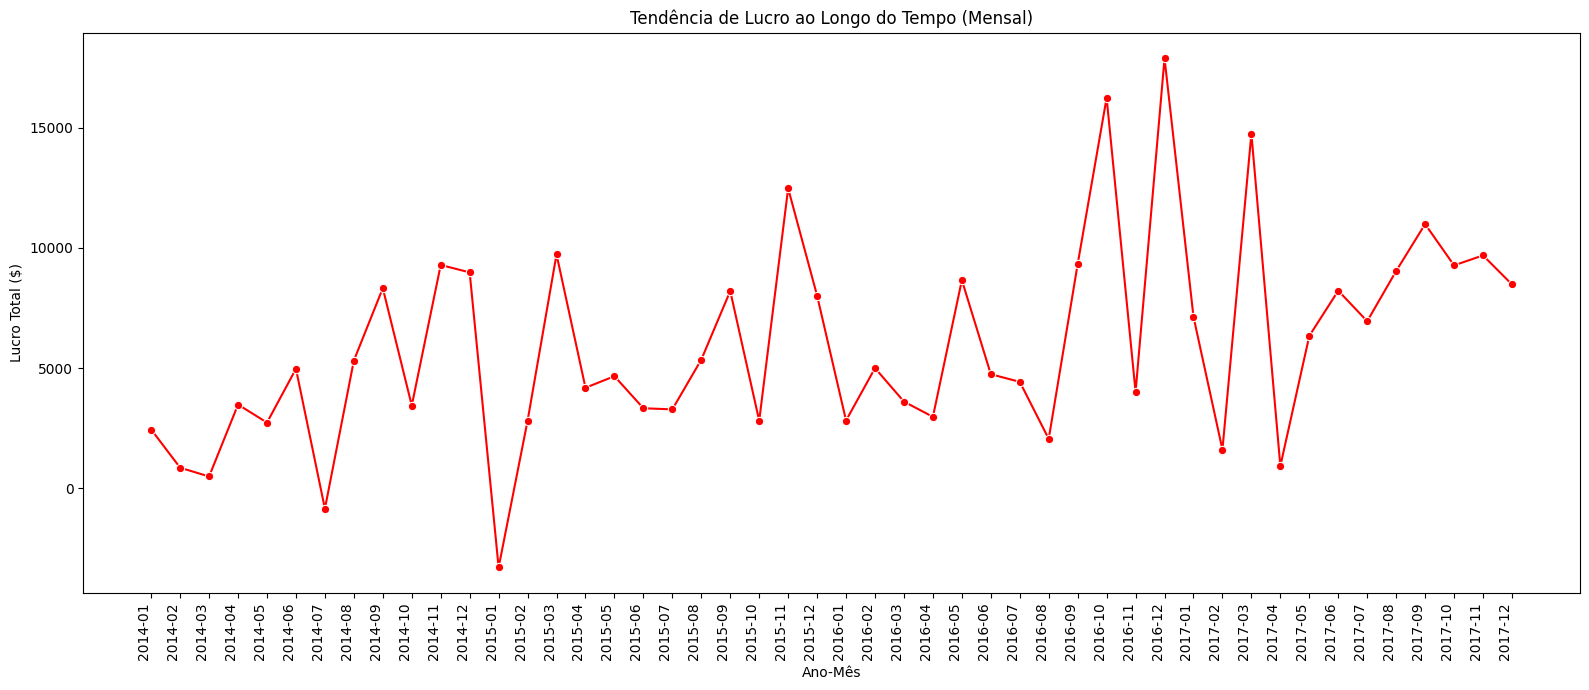

(Gráfico de Linhas: Tendência de Lucro ao Longo do Tempo - simulação)


In [59]:
# Visualização: Linha de Lucro ao longo do tempo.
plt.figure(figsize=(16, 7))
sns.lineplot(x='YearMonth', y='Profit', data=monthly_trends, marker='o', color='red')
plt.title('Tendência de Lucro ao Longo do Tempo (Mensal)')
plt.xlabel('Ano-Mês')
plt.ylabel('Lucro Total ($)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
print("(Gráfico de Linhas: Tendência de Lucro ao Longo do Tempo - simulação)")

In [60]:
# Análise por Mês do ano (média) para identificar sazonalidade mensal.
monthly_avg_performance = df.groupby('Order Month')[['Sales', 'Profit']].mean()
print("\nPerformance Média por Mês do Ano:")
print(monthly_avg_performance)


Performance Média por Mês do Ano:
                  Sales     Profit
Order Month                       
1            249.146550  23.974924
2            199.170838  34.315369
3            294.548116  41.084321
4            206.230731  17.346462
5            210.923553  30.491575
6            212.996763  29.687302
7            207.377601  19.482626
8            225.274877  30.845522
9            222.451154  26.650380
10           244.594609  38.808353
11           239.606438  24.111779
12           231.032318  30.801983


<ipython-input-61-f7fbb5c995f7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_performance.index, y=monthly_avg_performance['Sales'], palette='cool')


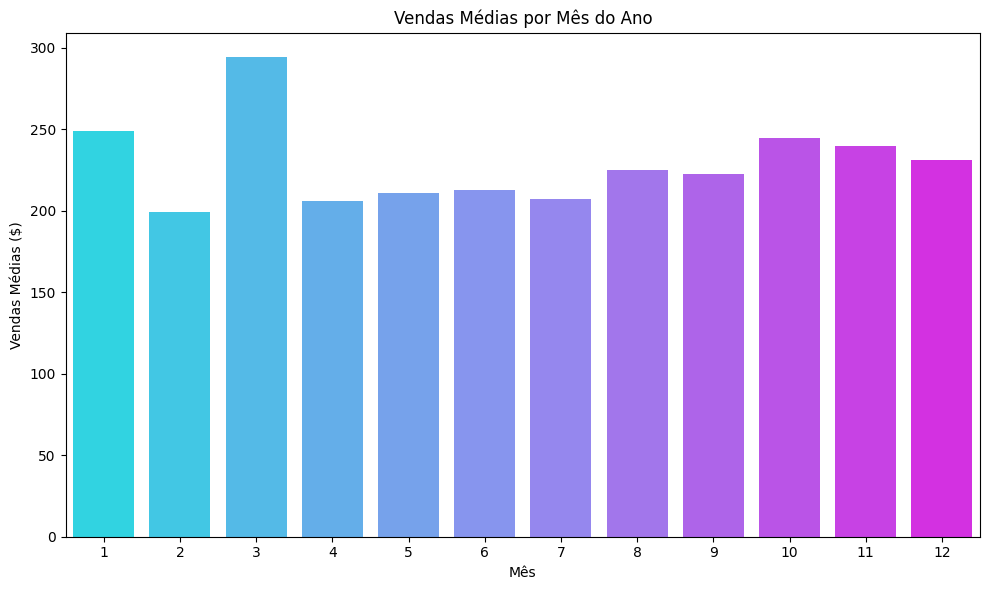

(Gráfico de Barras: Vendas Médias por Mês do Ano - simulação)


In [61]:
# Visualização: Barras de Vendas Médias por Mês.
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_performance.index, y=monthly_avg_performance['Sales'], palette='cool')
plt.title('Vendas Médias por Mês do Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas Médias ($)')
plt.tight_layout()
plt.show()
print("(Gráfico de Barras: Vendas Médias por Mês do Ano - simulação)")

## SEÇÃO 6: Impacto do Desconto nas Vendas e Lucros
Entender como a aplicação de descontos afeta a receita e a lucratividade.

In [62]:
# Análise da relação entre Desconto e Lucro/Vendas.
# Criar faixas de desconto para uma análise mais clara.
df['Discount_Band'] = pd.cut(df['Discount'], bins=[-0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                             labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%'],
                             right=False)
discount_impact = df.groupby('Discount_Band')[['Sales', 'Profit']].sum()
print("\nImpacto do Desconto (Vendas e Lucro por Faixa de Desconto):")
print(discount_impact)


Impacto do Desconto (Vendas e Lucro por Faixa de Desconto):
                      Sales       Profit
Discount_Band                           
0-10%          1.087908e+06  320987.6032
10-20%         8.192787e+04   10448.1685
20-30%         7.645944e+05   90337.3060
30-40%         1.177201e+05  -12760.4151
40-50%         1.219028e+05  -25550.1615
50-60%         5.891854e+04  -20506.4281
60-70%         6.644700e+03   -5944.6552
70-80%         4.062028e+04  -40075.3569


<ipython-input-62-d5d04434ae08>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount_Band')[['Sales', 'Profit']].sum()


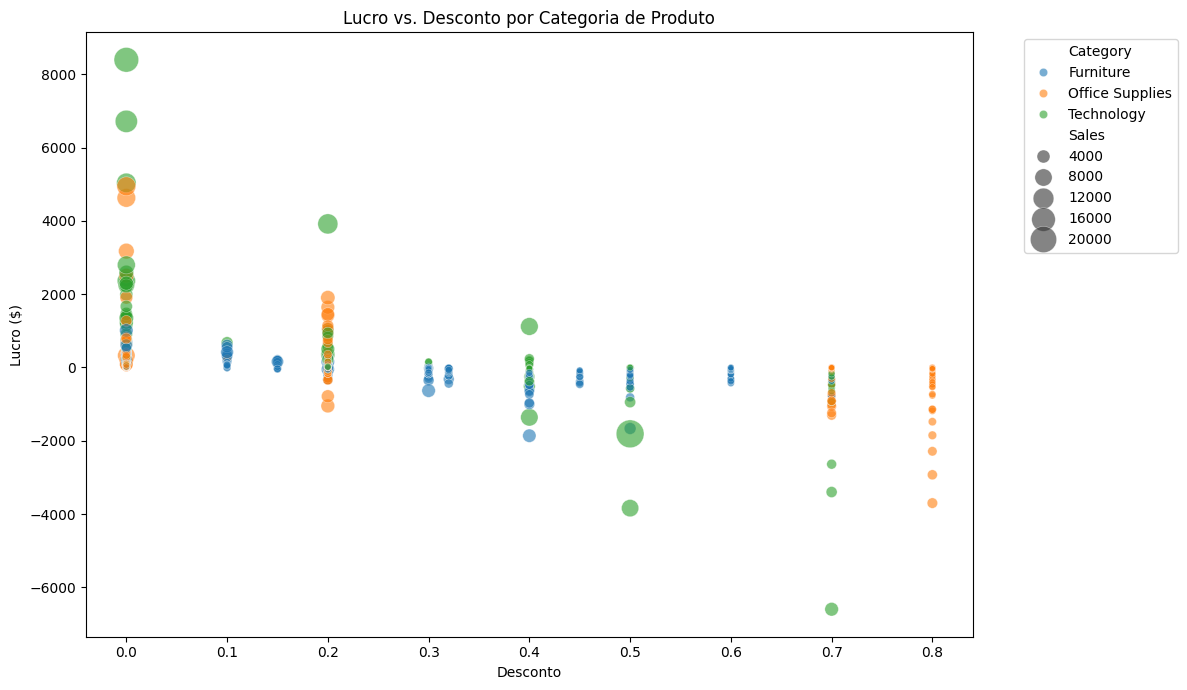

(Gráfico de Dispersão: Lucro vs. Desconto por Categoria - simulação)


In [63]:
# Visualização: Gráfico de Dispersão de Lucro vs. Desconto.
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', size='Sales', sizes=(20, 400), alpha=0.6)
plt.title('Lucro vs. Desconto por Categoria de Produto')
plt.xlabel('Desconto')
plt.ylabel('Lucro ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("(Gráfico de Dispersão: Lucro vs. Desconto por Categoria - simulação)")

<ipython-input-64-ebec16c17882>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_impact.index, y=discount_impact['Profit'], palette='plasma')


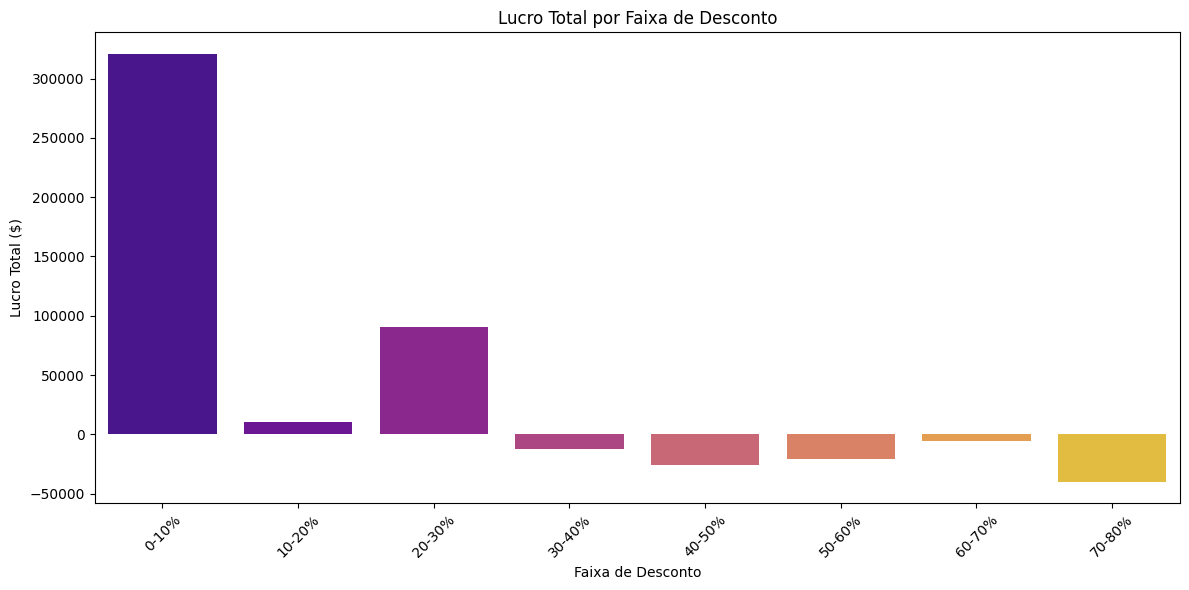

(Gráfico de Barras: Lucro Total por Faixa de Desconto - simulação)


In [64]:
# Visualização: Barras de Lucro por Faixa de Desconto.
plt.figure(figsize=(12, 6))
sns.barplot(x=discount_impact.index, y=discount_impact['Profit'], palette='plasma')
plt.title('Lucro Total por Faixa de Desconto')
plt.xlabel('Faixa de Desconto')
plt.ylabel('Lucro Total ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("(Gráfico de Barras: Lucro Total por Faixa de Desconto - simulação)")

## SEÇÃO 7: Análise do Modo de Envio e Rentabilidade
Avaliar se o modo de envio tem alguma relação com a lucratividade.

In [65]:
# Agrupar por Ship Mode e calcular o Lucro e Vendas.
shipmode_performance = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print("\nPerformance por Modo de Envio (Vendas e Lucro):")
print(shipmode_performance)


Performance por Modo de Envio (Vendas e Lucro):
                       Sales       Profit
Ship Mode                                
Standard Class  1.358216e+06  164088.7875
Second Class    4.591936e+05   57446.6354
First Class     3.514284e+05   48969.8399
Same Day        1.283631e+05   15891.7589


(Gráfico de Barras: Lucro Total por Modo de Envio - simulação)


<ipython-input-66-12c79c6290a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipmode_performance.index, y=shipmode_performance['Profit'], palette='cividis')


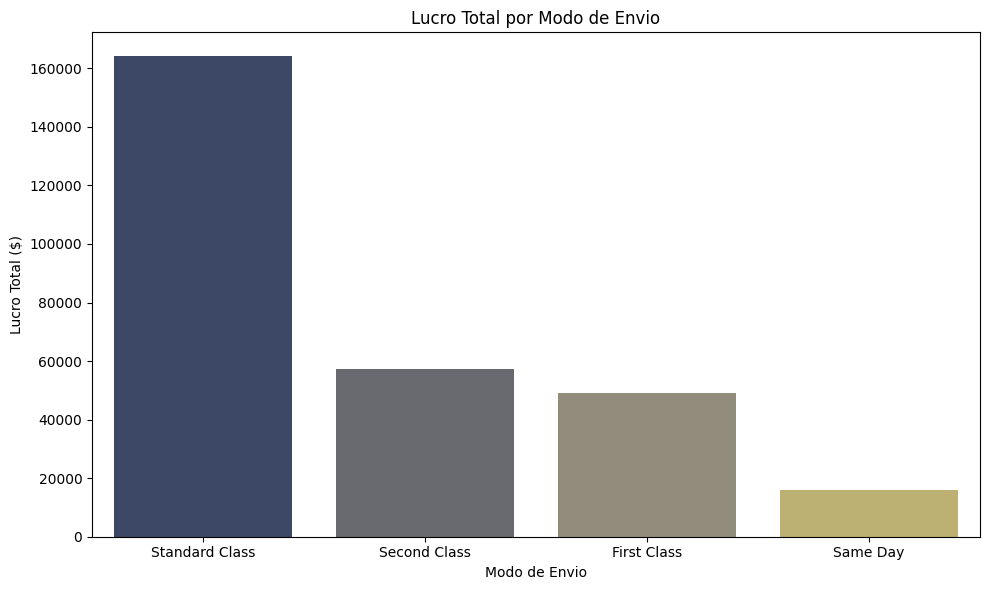

In [66]:
# Visualização: Gráfico de Barras para Lucro por Modo de Envio.
plt.figure(figsize=(10, 6))
sns.barplot(x=shipmode_performance.index, y=shipmode_performance['Profit'], palette='cividis')
plt.title('Lucro Total por Modo de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Lucro Total ($)')
plt.tight_layout()
# plt.show()
print("(Gráfico de Barras: Lucro Total por Modo de Envio - simulação)")